In [23]:
from mpl_toolkits.mplot3d import Axes3D #3d
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt #plotting
import os #accessing directory structure
import numpy as np #linear algebra
import pandas as pd #data processing(reading csv file)
import seaborn as sns

In [24]:
pwd

'/Users/q.chi1099/Desktop'

In [25]:
os.chdir('/Users/q.chi1099/Desktop/') #Change directory
cost_of_living =pd.read_csv("cost-of-living.csv") #Read file 
cost_of_living.describe()
cost_of_living.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


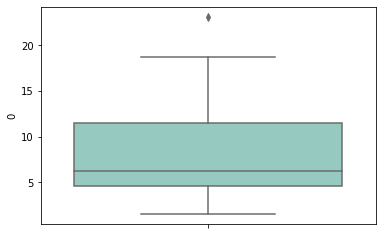

In [9]:
cost_of_living=cost_of_living.T
#Meal, inexpensive restaurant
sns.boxplot(y=cost_of_living[0][1:].astype(float), palette="Set3")

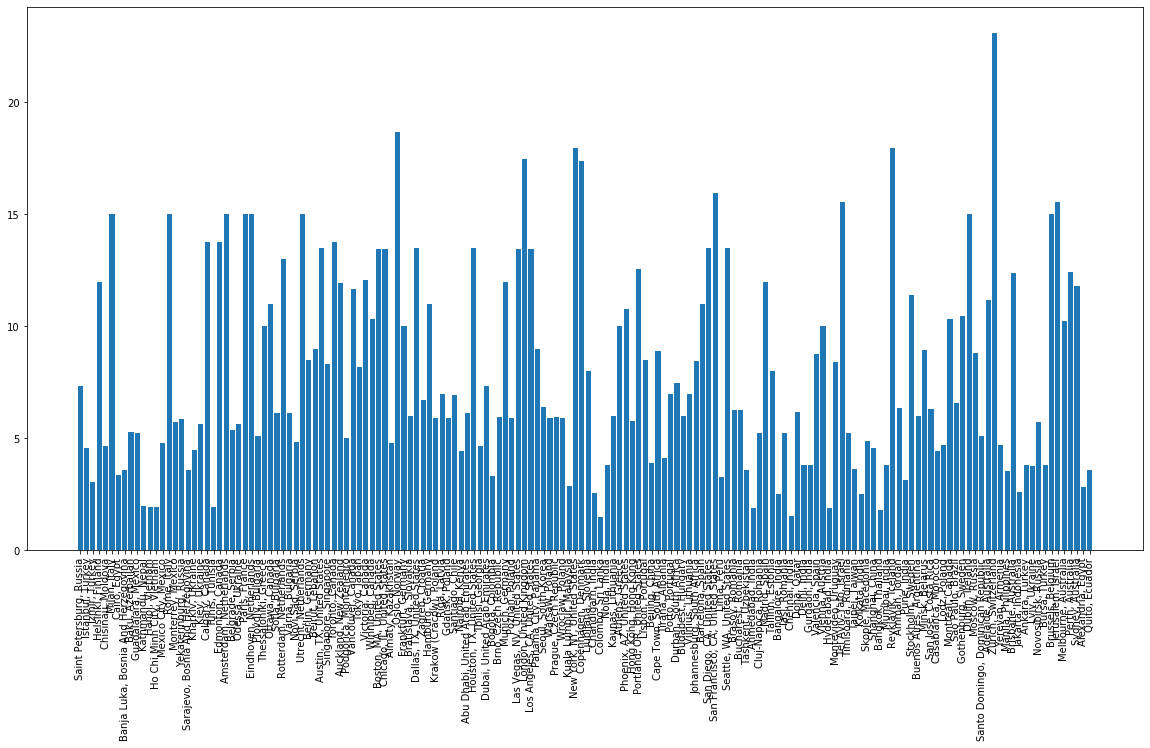

In [10]:
# Get data
# Restaurant costs
height = cost_of_living[0][1:].astype(float)
# Cities
bars = cost_of_living[0].keys()[1:]
y_pos = np.arange(len(bars))

# Set size
plt.figure(figsize=(20,10))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis & rotate them 90 degrees
plt.xticks(y_pos, bars, rotation=90)
 
# Show graphic
plt.show()

In [33]:
#Distribution graphs (histogram/bar graph) of columns data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df=df[[col for col in df if nunique[col]>1 and nunique[col]<50]] #Pick columns that have between 1 and 50 unique values.
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1)/nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range (min(nCol, nGraphShown)):
        plt.subplot(nGraphShown, nGraphPerRow, i+1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
          

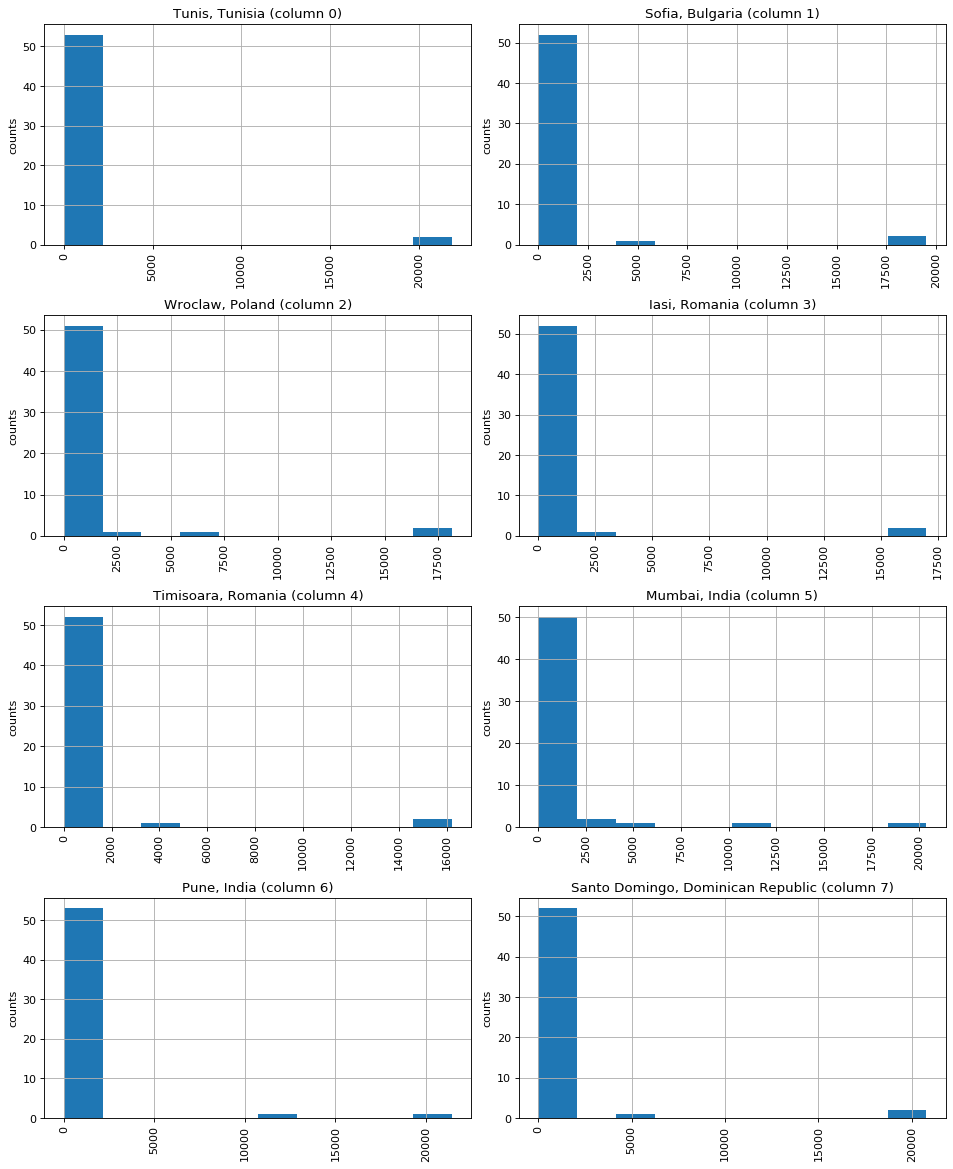

In [40]:
plotPerColumnDistribution(cost_of_living, 10, 2)